In [7]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [9]:
import IPython
from IPython.display import Audio
import ipywidgets as widgets
from ipywidgets import interact,interactive,fixed,interact_manual


In [96]:
figsize=(10,5)
linewidth=2.5
matplotlib.rcParams.update({'font.size': 16})

# Constants
fs = 44100
time_sig = np.linspace(0, 0.05, 4*fs)
samples = np.arange(2*fs)
fourier = np.linspace(0, .2*np.pi, 2*fs)
NB_RAND_TONES = 3 # numbers of random frequencies we want
# the amplitude is set to 0.5 by default, because audio normalize must be between -1 and 1
REF_SIG = sine(0.5, 2*np.pi*5000, 0, time_sig)


freq = 1000

In [88]:
# Generate standard reference tone
def sine(A, w, phi, n):
    return A * np.sin(w*n - phi)

def generate_reference_tone_with_plot_audio(standard):
    rand_freq = np.random.uniform(20,15000)
    global freq
    freq = 5000 if standard else rand_freq
    global ref_sig
    global time_sig
    ref_sig = sine(0.5, 2*np.pi*freq, 0, time_sig)
    plt.figure(figsize=figsize)
    plt.plot(time_sig, ref_sig , linewidth=linewidth,color="slateblue",  label="Sine")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend(loc='upper right')
    plt.show()
    display(Audio(ref_sig, rate=fs, normalize=False))

def generate_random_tone():
    rand_freq = np.random.uniform(20,15000)
    # the amplitude is set to 0.5 by default, because audio normalize must be between -1 and 1
    rand_sig = sine(0.5, 2*np.pi*rand_freq, 0, time_sig) 
    return (rand_sig, rand_freq)

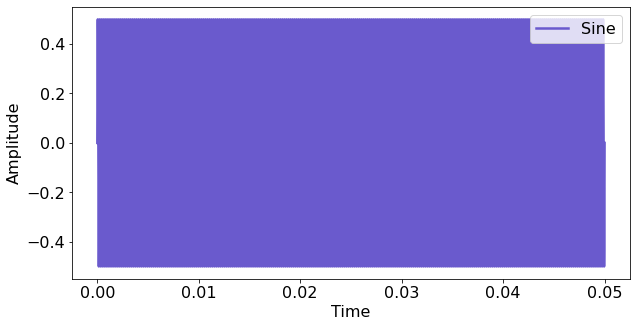

In [89]:
generate_reference_tone(True)

In [90]:
# array that stores tuples (frequency, volume)
volume_arr = [(None, None) for i in range(0, NB_RAND_TONES)]

def change_volume(A, N):
    r_freq = rand_arr[N]
    volume_arr[N] = (r_freq, A)
    rand_sig = sine(A/100, 2*np.pi*r_freq, 0, time_sig)
    display(Audio(rand_sig, rate=fs, normalize=False))

Audio(REF_SIG, rate=fs, normalize=False)

In [91]:
# Array that stores random frequencies
rand_arr = [generate_random_tone()[1] for i in range(0, NB_RAND_TONES)]

for x in range(0, NB_RAND_TONES):   
    print("Slider : " + str(x+1) + " Freq : " + str(rand_arr[x]))
    interact(change_volume, A=widgets.IntSlider(min=0, max=100, step=1, value=50), N=fixed(x))

Audio(REF_SIG, rate=fs, normalize=False)

Slider : 1 Freq : 9568.603682797208


interactive(children=(IntSlider(value=50, description='A'), Output()), _dom_classes=('widget-interact',))

Slider : 2 Freq : 7209.829090839744


interactive(children=(IntSlider(value=50, description='A'), Output()), _dom_classes=('widget-interact',))

Slider : 3 Freq : 11365.974192119638


interactive(children=(IntSlider(value=50, description='A'), Output()), _dom_classes=('widget-interact',))

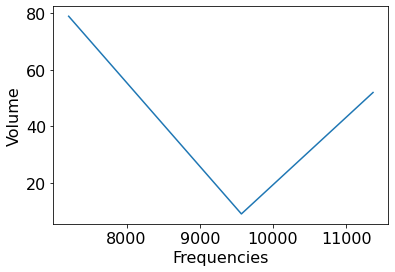

In [95]:
def final_plot():
    # Sort the data by frequencies
    volume_arr.sort(key=lambda tup: tup[0])
    plt.plot(*zip(*volume_arr))
    plt.xlabel("Frequencies")
    plt.ylabel("Volume")
#    plt.legend(loc='upper right') 
    plt.show()
    return

final_plot()